# Lab 8: Define and Solve an ML Problem of Your Choosing

In [27]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [28]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(airbnbDataSet_filename)

df.head()

,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.80,0.17,True,8.0,...,4.79,4.86,4.41,False,3,3,0,0,0.33,9
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,LisaRoxanne,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,0.09,0.69,True,1.0,...,4.80,4.71,4.64,False,1,1,0,0,4.86,6
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,Rebecca,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",1.00,0.25,True,1.0,...,5.00,4.50,5.00,False,1,1,0,0,0.02,3
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Shunichi,"New York, New York, United States",I used to work for a financial industry but no...,1.00,1.00,True,1.0,...,4.42,4.87,4.36,False,1,0,1,0,3.68,4
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,MaryEllen,"New York, New York, United States",Welcome to family life with my oldest two away...,NaN,NaN,True,1.0,...,4.95,4.94,4.92,False,1,0,1,0,0.87,7


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1. Airbnb dataset
2. We will be predicting the guest review of a listing. The label is "review_scores_value" which represents the review scores given by guests to the listings.
3.  is a supervised learning problem since we have a labeled dataset where the “review_scores_value” is known for each listing. It’s a regression problem because the “review_scores_value” is a continuous variable ranging from 0 to 5. It’s not a classification problem since we’re not categorizing the listings into distinct classes.
4. Our features include both binary and numerical columns from the dataset. These could be attributes like the number of bedrooms, bathrooms, amenities available, price, etc. 
5. Predicting the review score of a listing is important for both hosts and Airbnb, where for hosts, this model is important in order to understand the factors that influence their review scores since it can help them improve their listings and provide better experiences for their guests. For Airbnb, this model can help identify high-quality listings and promote them to potential guests, improving the overall customer experience. 

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

### Inspecting the Data

In [29]:
# Number of rows and columns
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Number of rows: 28022
Number of columns: 50


In [30]:
# Summary statistics
df.describe()

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
count,16179.000000,16909.000000,28022.000000,28022.000000,28022.000000,28022.000000,25104.000000,26668.000000,28022.000000,28022.000000,...,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000
mean,0.906901,0.791953,14.554778,14.554778,2.874491,1.142174,1.329708,1.629556,154.228749,18.689387,...,4.814300,4.808041,4.750393,4.647670,9.581900,5.562986,3.902077,0.048283,1.758325,5.169510
std,0.227282,0.276732,120.721287,120.721287,1.860251,0.421132,0.700726,1.097104,140.816605,25.569151,...,0.438603,0.464585,0.415717,0.518023,32.227523,26.121426,17.972386,0.442459,4.446143,2.028497
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,29.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000,1.000000
25%,0.940000,0.680000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,70.000000,2.000000,...,4.810000,4.810000,4.670000,4.550000,1.000000,0.000000,0.000000,0.000000,0.130000,4.000000
50%,1.000000,0.910000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,115.000000,30.000000,...,4.960000,4.970000,4.880000,4.780000,1.000000,1.000000,0.000000,0.000000,0.510000,5.000000
75%,1.000000,1.000000,3.000000,3.000000,4.000000,1.000000,1.000000,2.000000,180.000000,30.000000,...,5.000000,5.000000,5.000000,5.000000,3.000000,1.000000,1.000000,0.000000,1.830000,7.000000
max,1.000000,1.000000,3387.000000,3387.000000,16.000000,8.000000,12.000000,21.000000,1000.000000,1250.000000,...,5.000000,5.000000,5.000000,5.000000,421.000000,308.000000,359.000000,8.000000,141.000000,13.000000


In [31]:
# Checking the datatypes of the columns
df.dtypes

name                                             object
description                                      object
neighborhood_overview                            object
host_name                                        object
host_location                                    object
host_about                                       object
host_response_rate                              float64
host_acceptance_rate                            float64
host_is_superhost                                  bool
host_listings_count                             float64
host_total_listings_count                       float64
host_has_profile_pic                               bool
host_identity_verified                             bool
neighbourhood_group_cleansed                     object
room_type                                        object
accommodates                                      int64
bathrooms                                       float64
bedrooms                                        

In [32]:
# Looking for missing values
df.isnull().sum()

name                                                5
description                                       570
neighborhood_overview                            9816
host_name                                           0
host_location                                      60
host_about                                      10945
host_response_rate                              11843
host_acceptance_rate                            11113
host_is_superhost                                   0
host_listings_count                                 0
host_total_listings_count                           0
host_has_profile_pic                                0
host_identity_verified                              0
neighbourhood_group_cleansed                        0
room_type                                           0
accommodates                                        0
bathrooms                                           0
bedrooms                                         2918
beds                        

In [33]:
# Finding categorical values
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"{col}: {df[col].nunique()} unique values")

name: 27386 unique values
description: 25952 unique values
neighborhood_overview: 15800 unique values
host_name: 7566 unique values
host_location: 1364 unique values
host_about: 11962 unique values
neighbourhood_group_cleansed: 5 unique values
room_type: 4 unique values
amenities: 25020 unique values


### Visualizing the Data

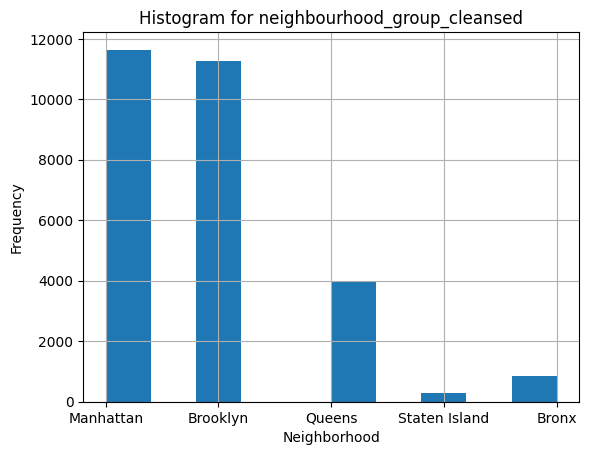

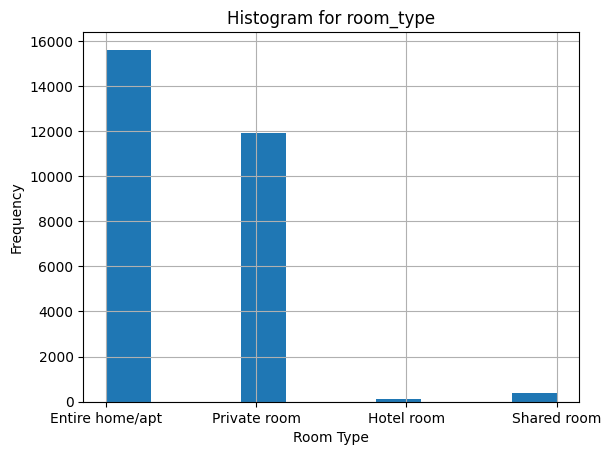

In [34]:
# Distributions of categorical variables
df['neighbourhood_group_cleansed'].hist()
plt.title("Histogram for neighbourhood_group_cleansed")
plt.xlabel("Neighborhood")
plt.ylabel("Frequency")
plt.show()

df['room_type'].hist()
plt.title("Histogram for room_type")
plt.xlabel("Room Type")
plt.ylabel("Frequency")
plt.show()

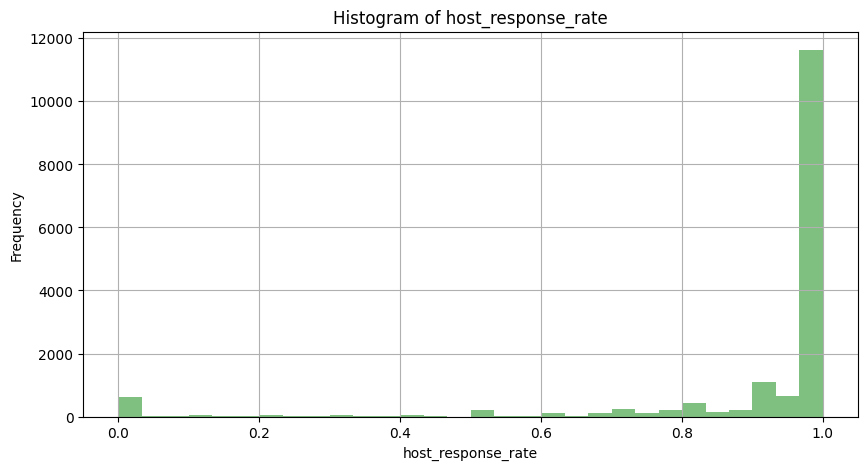

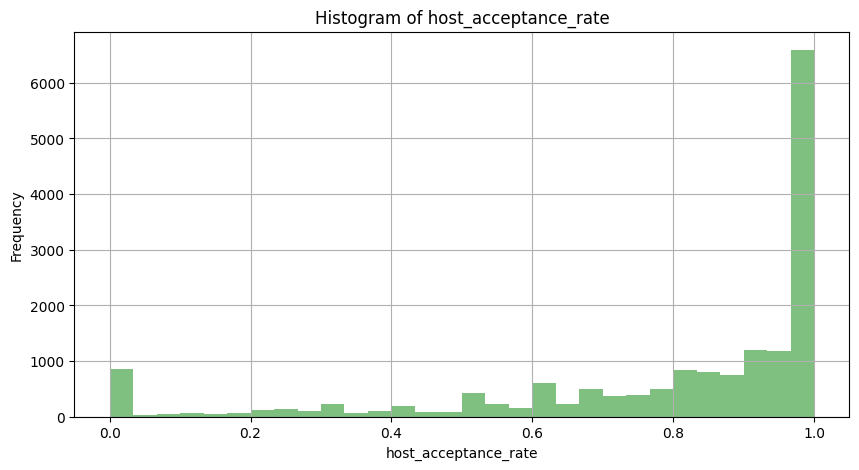

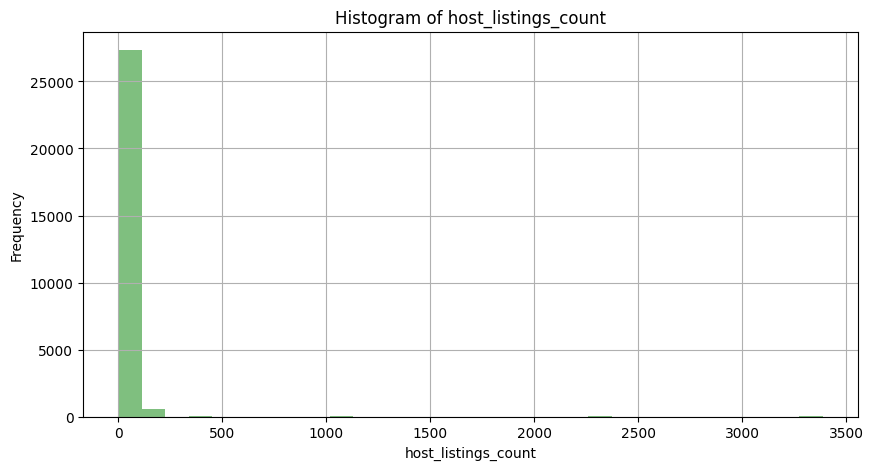

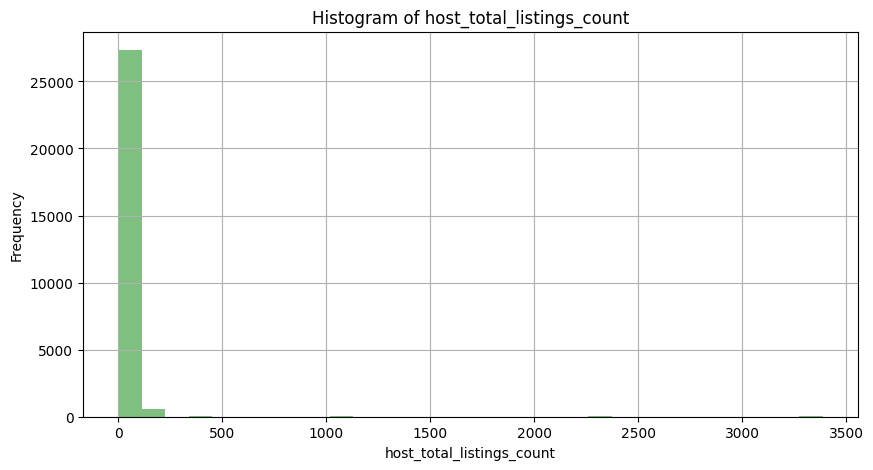

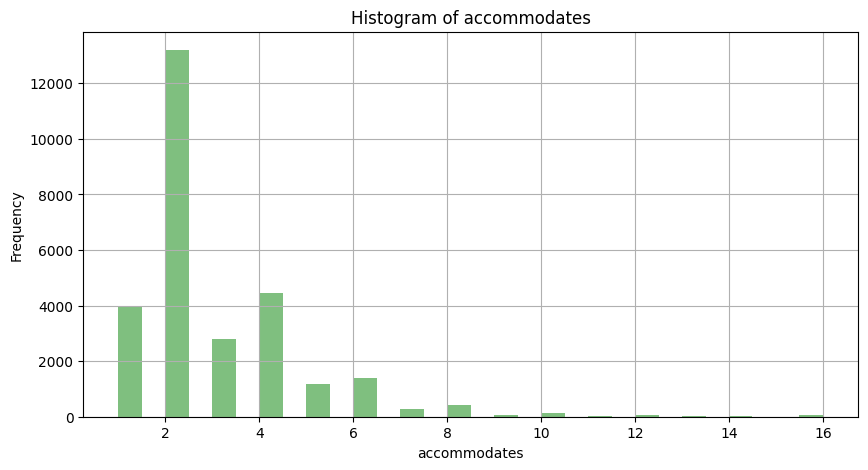

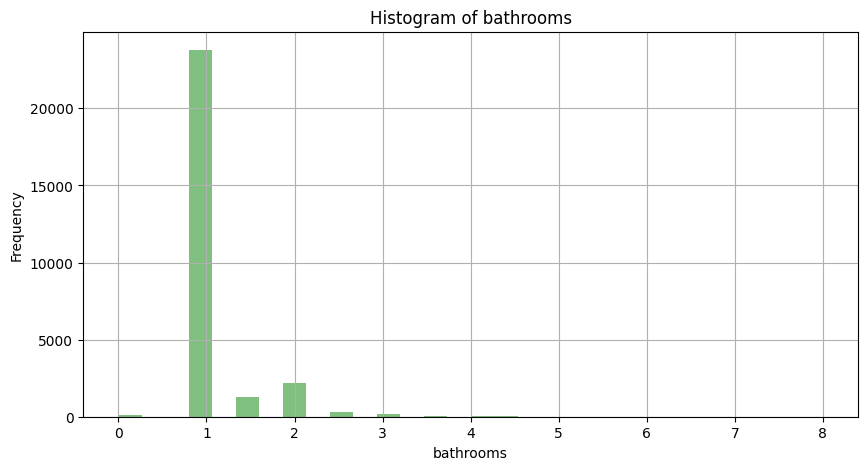

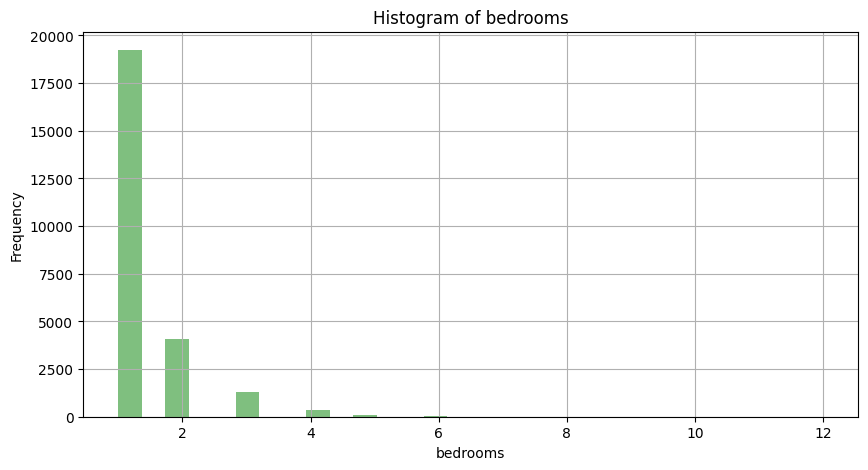

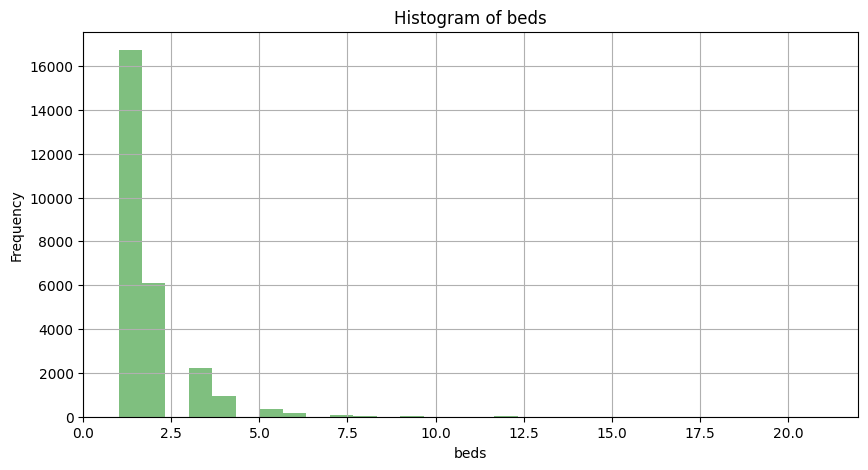

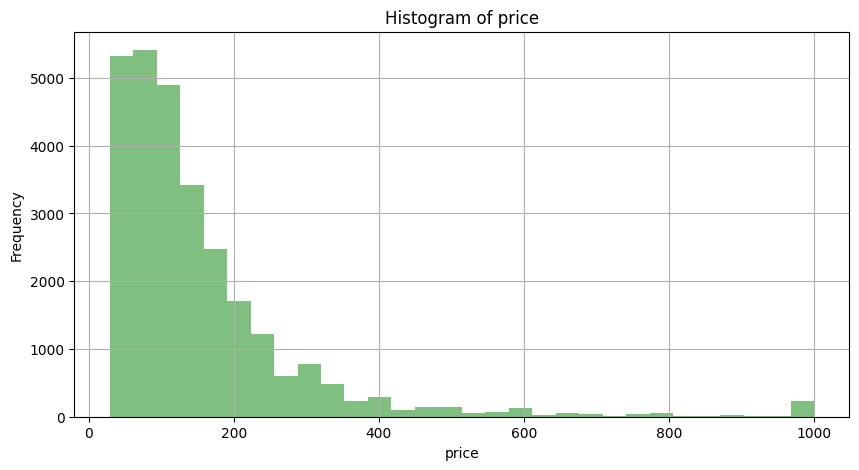

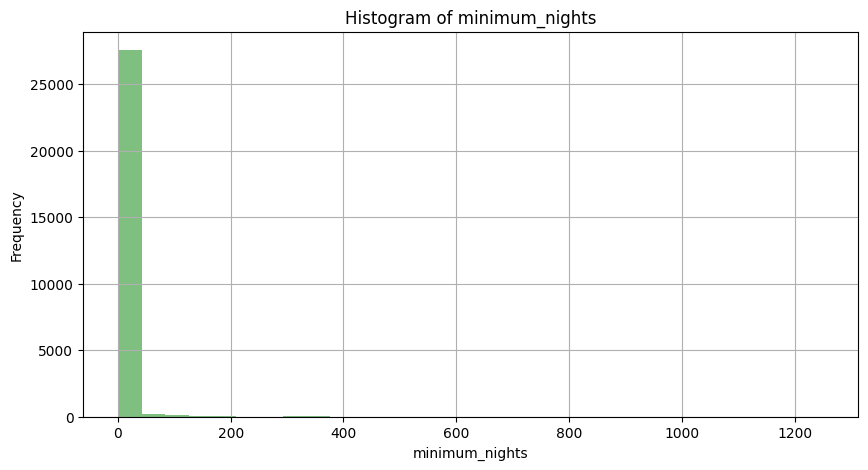

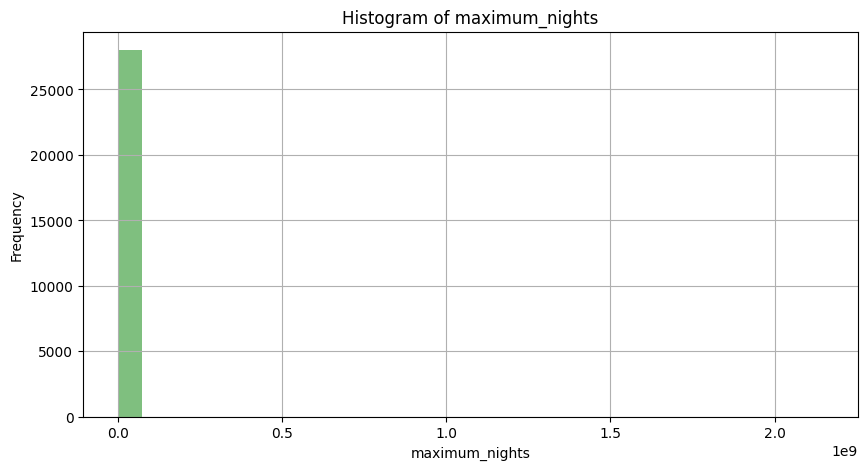

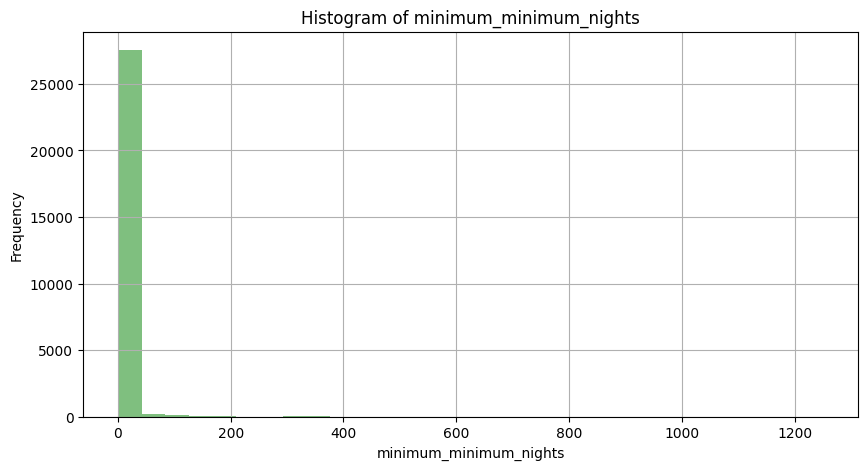

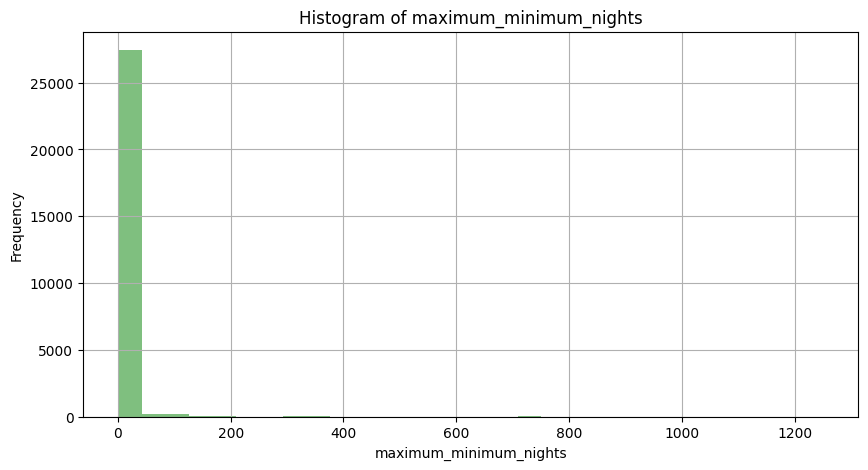

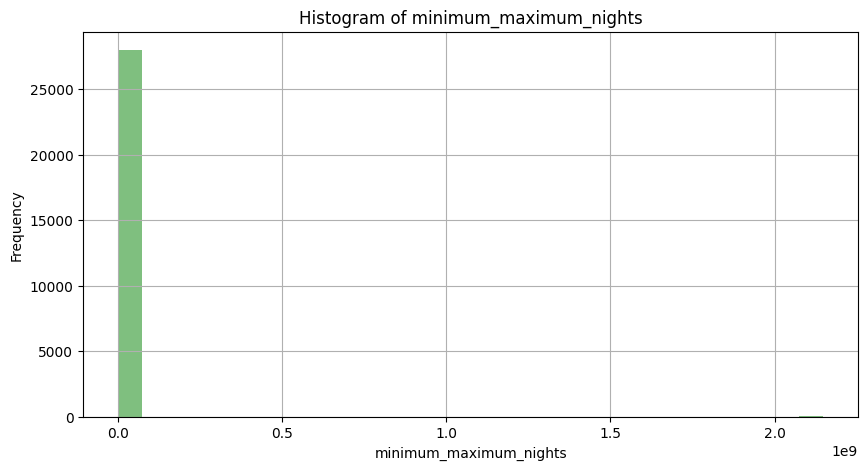

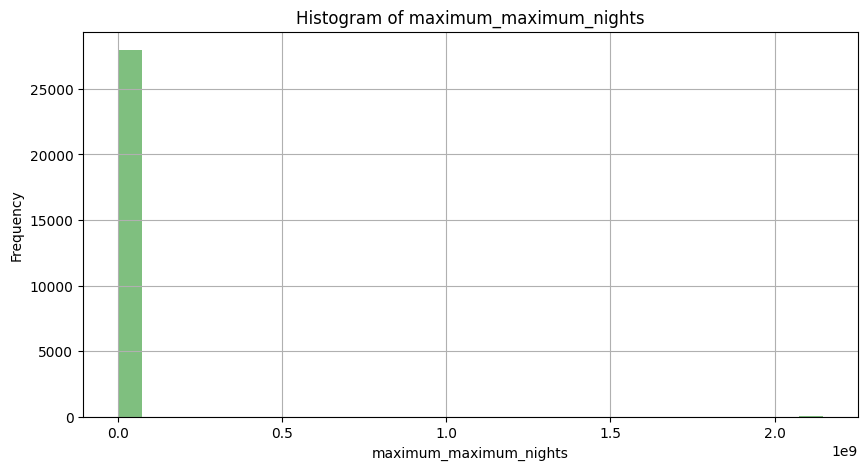

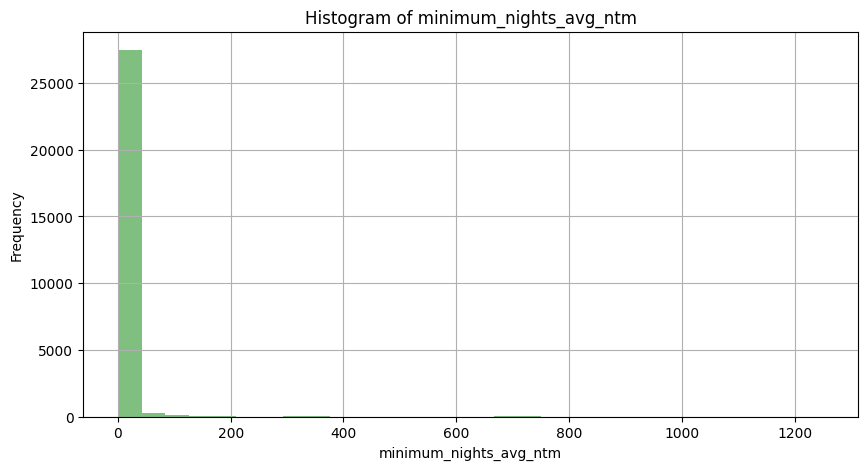

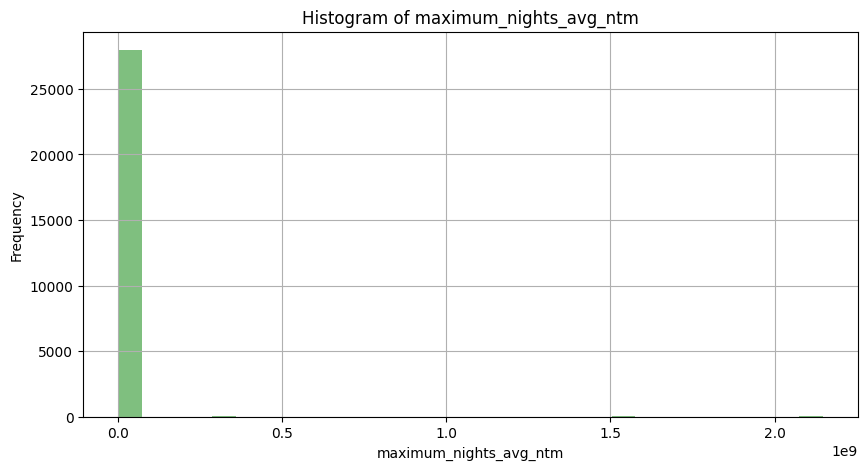

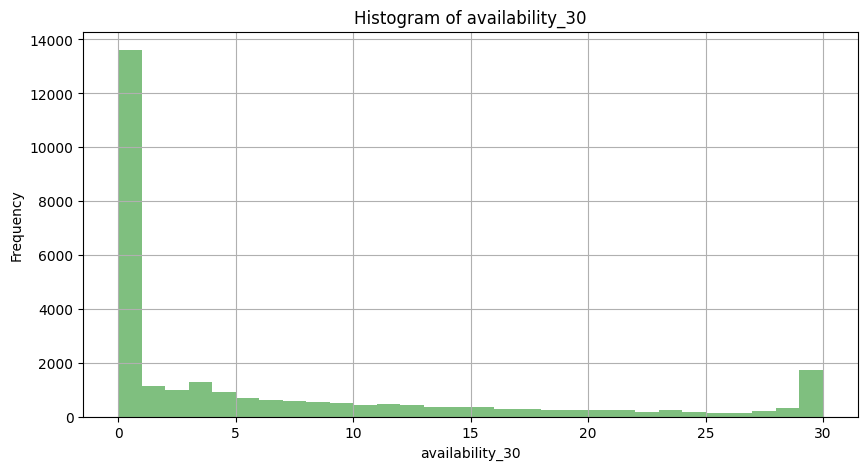

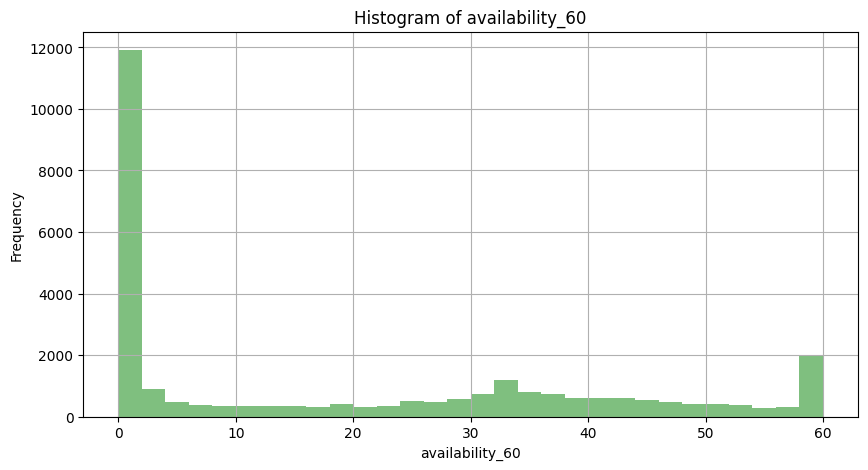

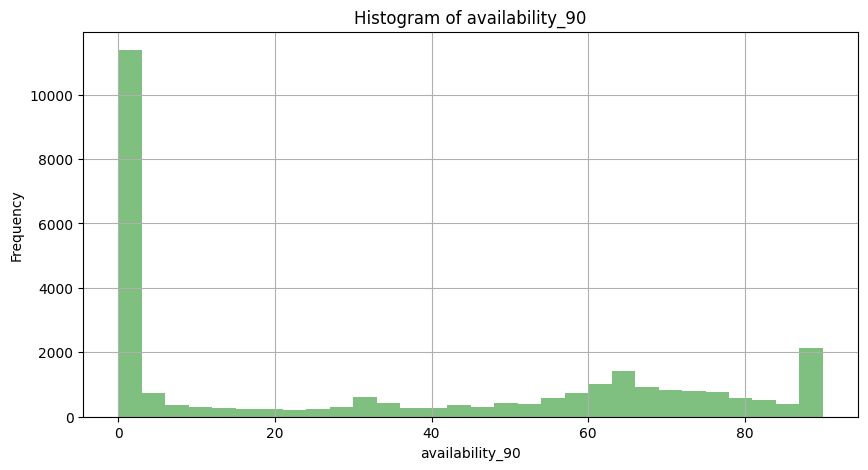

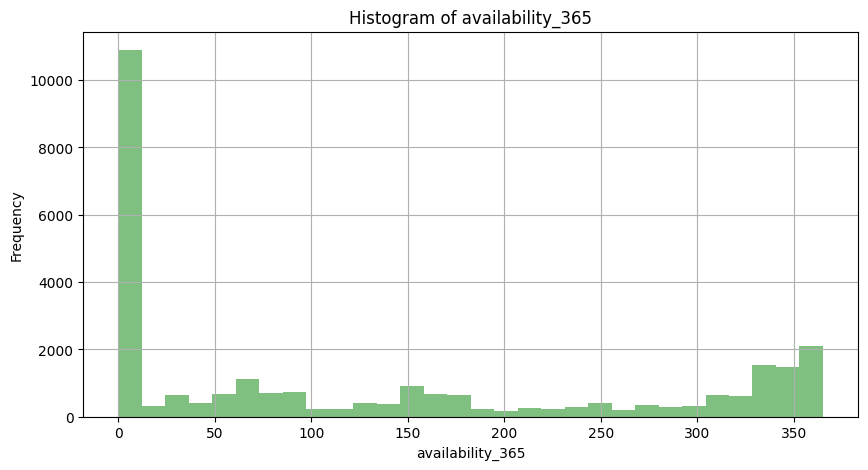

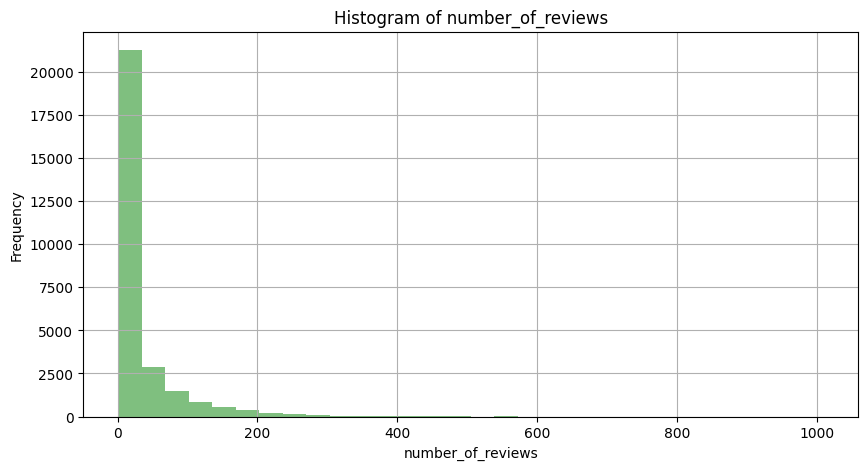

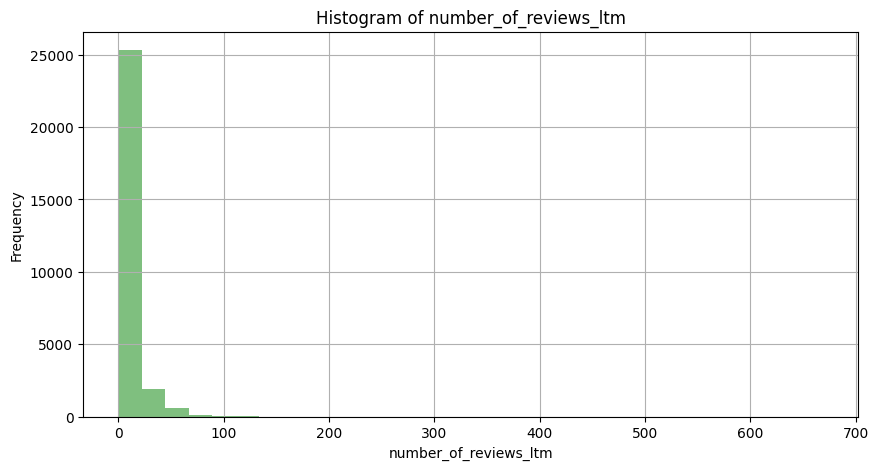

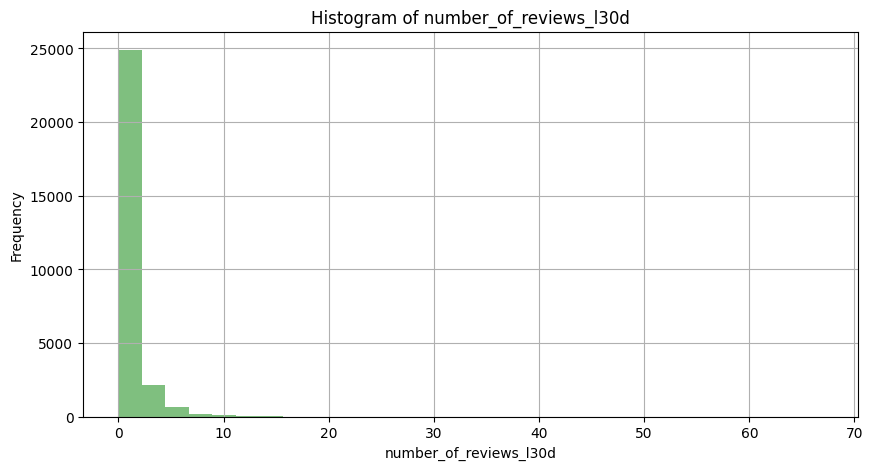

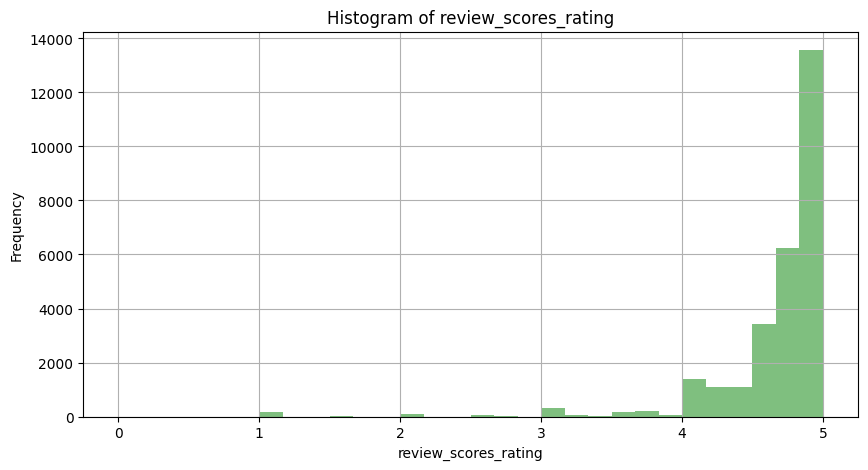

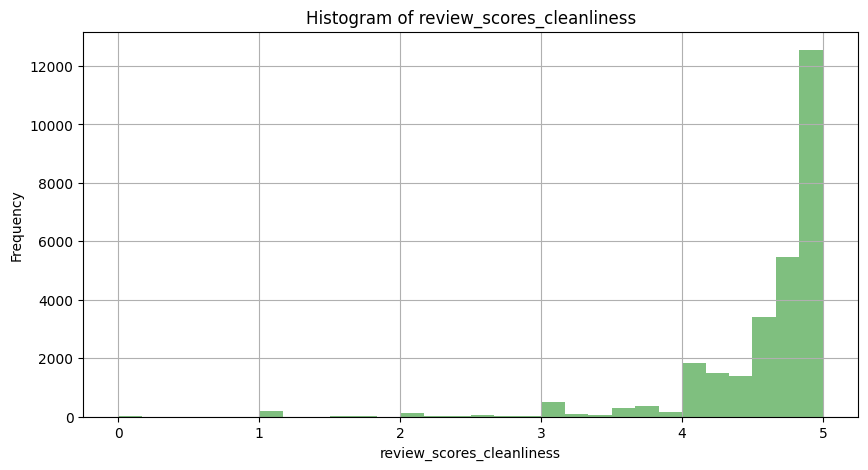

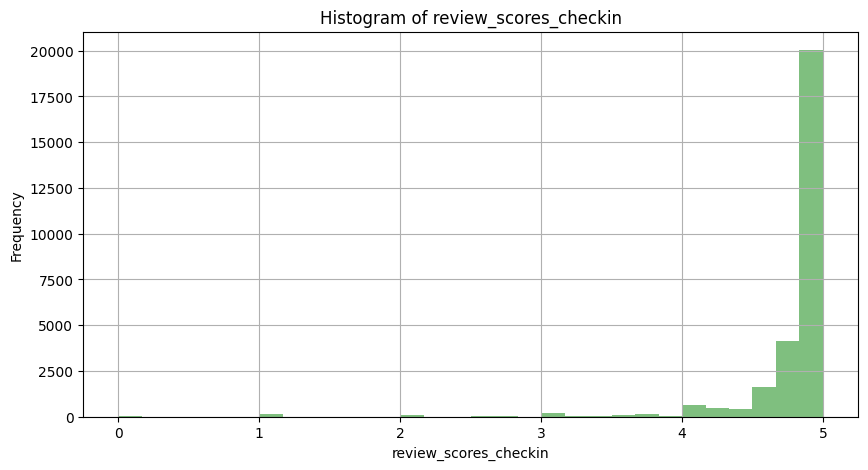

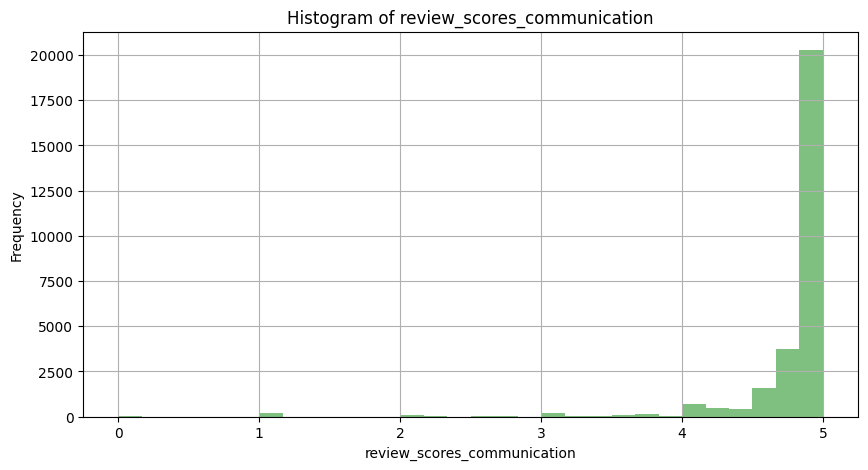

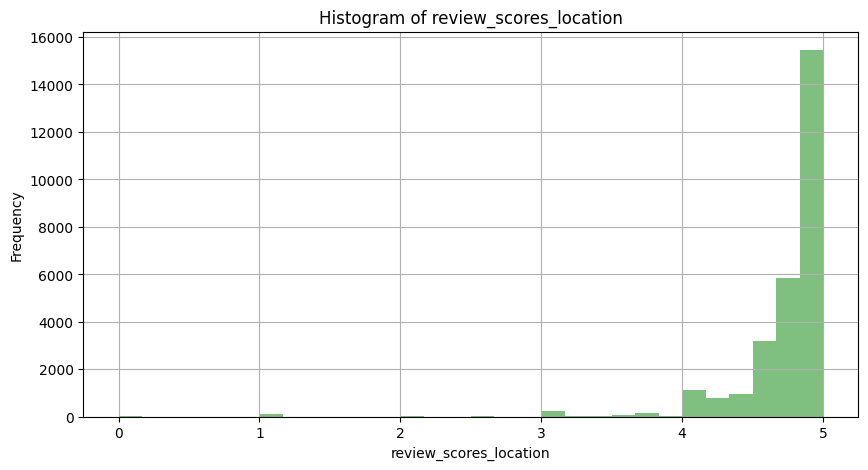

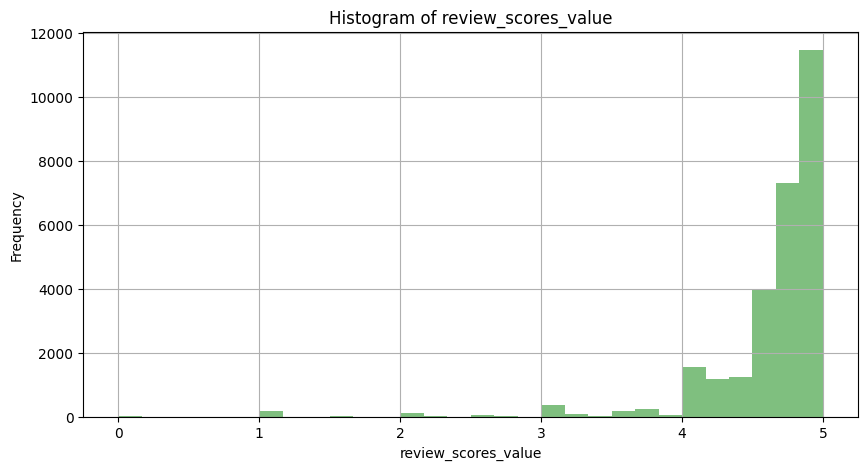

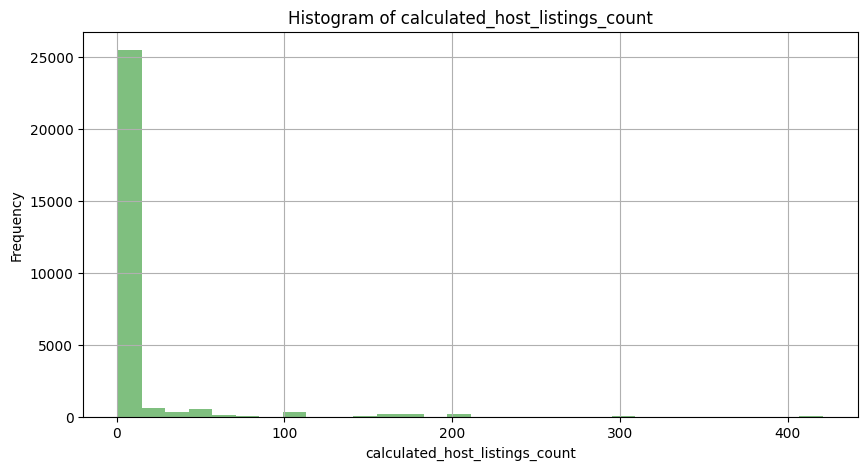

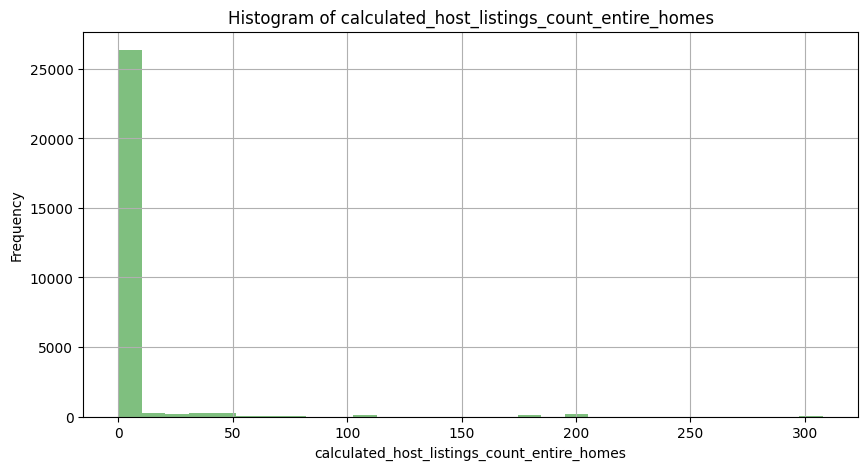

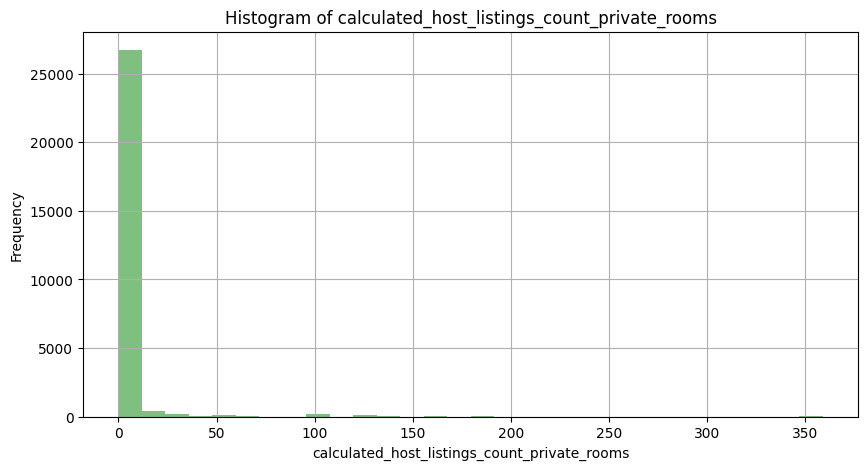

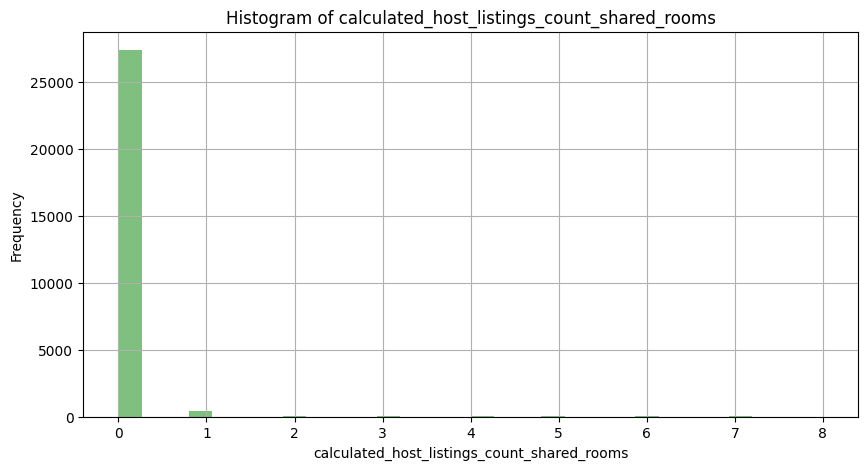

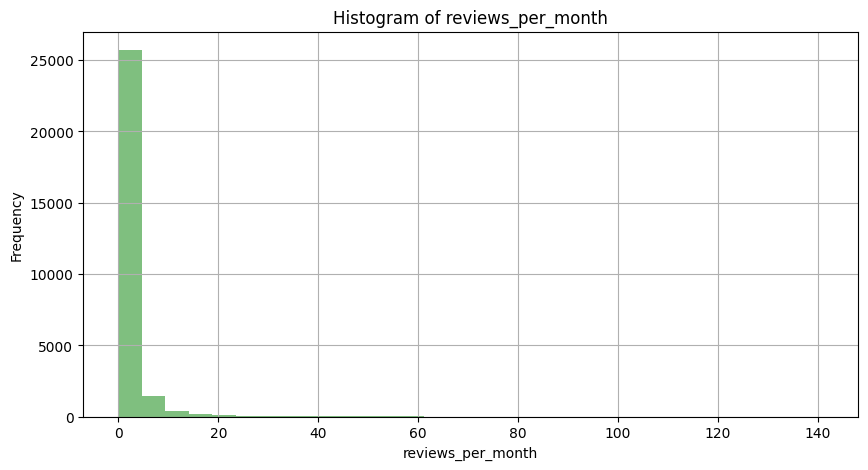

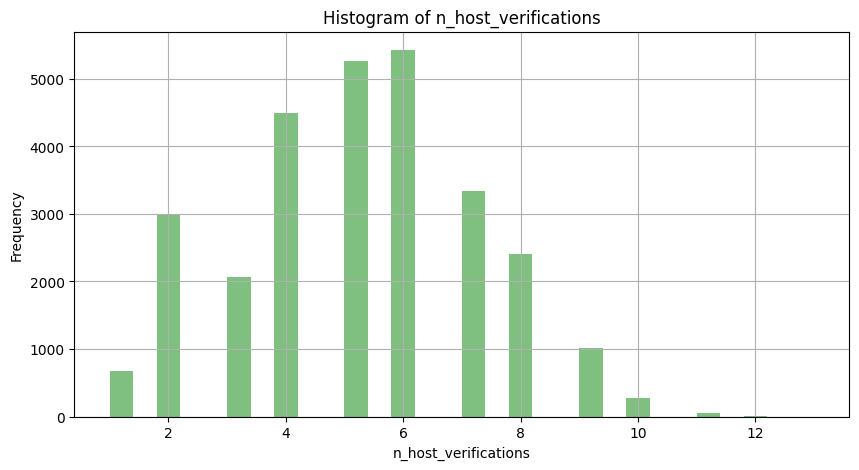

In [35]:
# Distributions of numerical variables
num_cols = ['host_response_rate', 'host_acceptance_rate', 'host_listings_count', 'host_total_listings_count', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'reviews_per_month', 'n_host_verifications']

# Plot histograms
for col in num_cols:
    plt.figure(figsize=(10, 5))
    plt.hist(df[col].dropna(), bins=30, alpha=0.5, color='g')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

### Data Preprocessing

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

* Yes, the new feature list is all of the numerical features as well as the categorical features with a reasonable amount of
* The data preparation techniques I will use are:
- One-Hot Encoding: Applied to categorical features with multiple datatypesto convert them into a numerical format.
- Label Encoding: Used for boolean features to convert them into binary values.
- Dropping Missing Values: In cases where a feature is not crucial or has many missing values, it can be dropped.
- Handling Missing Values With
-- Imputation: Used the mean to fill in missing values.
-- Winsorization: Applied to numerical features to limit extreme values and reduce the impact of outliers.
-- Min-Max Normalization: Scaled the features to a range of 0 to 1 to make sure that they are on a similar scale
* My model is a simple neural network with the following architecture:
- Input Layer: Takes the input features.
- Hidden Layers: Two layers with 128 and 64 neurons using the ReLU activation function.
- Output Layer: A single neuron with a linear activation function for regression.
* Training and Validation Plan
- Split the data into training (80%) and testing (20%) sets to evaluate model performance.
- Model Training:
-- Compile the model using the mean squared error (MSE) loss function and the SGD optimizer with a learning rate of 0.001.
- Performance Analysis:
-- Evaluate model performance using the validation set after each epoch, and print out metrics like MSE on both training and validation sets
-- Assess the final performance on the test set, and look at metrics like MSE, mean absolute error (MAE), and R-squared (R**2) to evaluate
- Model Improvement:
-- Hyperparameter Tuning: Use GridSearchCV to optimize hyperparameters such as the number of hidden layers, learning rate, and number of epochs.
-- Regularization: Add techniques like dropout or L2 regularization to prevent overfitting.
--Dropout: Add dropout layers to prevent overfitting by randomly setting a fraction of the input units to 0 at each update during training


##Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [56]:
# !pip install tensorflow

import tensorflow as tf
import tensorflow 

from tensorflow import keras
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from scipy.stats.mstats import winsorize
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer, Dropout
from tensorflow.keras.optimizers import SGD
import time

In [37]:
# One-Hot Encoding on categorical features with multiple datatypes
one_hot_cols = ['neighbourhood_group_cleansed', 'room_type']
df = pd.get_dummies(df, columns=one_hot_cols)

# Label Encoder for boolean features
bool_cols = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'has_availability', 'instant_bookable']
le = LabelEncoder()

for col in bool_cols:
    df[col] = le.fit_transform(df[col])

df.columns

Index(['name', 'description', 'neighborhood_overview', 'host_name',
       'host_location', 'host_about', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'review_scores_rating',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'calculated_host_

In [38]:
features = ['host_response_rate',
            'host_acceptance_rate', 
            'host_is_superhost', 
            'host_listings_count',
            'host_total_listings_count', 
            'host_has_profile_pic',
            'host_identity_verified', 
            'accommodates', 
            'bathrooms', 
            'bedrooms',
            'beds', 
            'price', 
            'minimum_nights', 
            'maximum_nights',
            'minimum_minimum_nights', 
            'maximum_minimum_nights',
            'minimum_maximum_nights', 
            'maximum_maximum_nights',
            'minimum_nights_avg_ntm', 
            'maximum_nights_avg_ntm', 
            'has_availability',
            'availability_30', 
            'availability_60', 
            'availability_90',
            'availability_365', 
            'number_of_reviews', 
            'number_of_reviews_ltm',
            'number_of_reviews_l30d', 
            'review_scores_rating',
            'review_scores_cleanliness', 
            'review_scores_checkin',
            'review_scores_communication', 
            'review_scores_location',
            'review_scores_value', 
            'instant_bookable',
            'calculated_host_listings_count',
            'calculated_host_listings_count_entire_homes',
            'calculated_host_listings_count_private_rooms',
            'calculated_host_listings_count_shared_rooms', 
            'reviews_per_month',
            'n_host_verifications', 
            'neighbourhood_group_cleansed_Bronx',
            'neighbourhood_group_cleansed_Brooklyn',
            'neighbourhood_group_cleansed_Manhattan',
            'neighbourhood_group_cleansed_Queens',
            'neighbourhood_group_cleansed_Staten Island',
            'room_type_Entire home/apt', 
            'room_type_Hotel room',
            'room_type_Private room', 
            'room_type_Shared room']

In [39]:
# Handle Missing Values
df.isnull().sum()

name                                                5
description                                       570
neighborhood_overview                            9816
host_name                                           0
host_location                                      60
host_about                                      10945
host_response_rate                              11843
host_acceptance_rate                            11113
host_is_superhost                                   0
host_listings_count                                 0
host_total_listings_count                           0
host_has_profile_pic                                0
host_identity_verified                              0
accommodates                                        0
bathrooms                                           0
bedrooms                                         2918
beds                                             1354
amenities                                           0
price                       

In [40]:
# Finding and replacing outliers
features_to_normalize = ['host_response_rate', 'host_acceptance_rate', 'host_listings_count',
                         'host_total_listings_count', 'accommodates', 'bathrooms', 'bedrooms',
                         'beds', 'price', 'minimum_nights', 'maximum_nights',
                         'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights',
                         'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm',
                         'availability_30', 'availability_60', 'availability_90',
                         'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
                         'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_cleanliness',
                         'review_scores_checkin', 'review_scores_communication',
                         'review_scores_location', 'review_scores_value',
                         'calculated_host_listings_count',
                         'calculated_host_listings_count_entire_homes',
                         'calculated_host_listings_count_private_rooms',
                         'calculated_host_listings_count_shared_rooms', 'reviews_per_month',
                         'n_host_verifications']

for feature in features_to_normalize:
    # Winsorization
    df[feature] = winsorize(df[feature], limits=[0.05, 0.05])

    # Min-Max normalization
    scaler = MinMaxScaler()
    df[features_to_normalize] = scaler.fit_transform(df[features_to_normalize])

In [41]:
# Handle missing values by using the mean 
columns_with_missing_values = ['host_response_rate', 'host_acceptance_rate', 'bedrooms']
df[columns_with_missing_values] = df[columns_with_missing_values].fillna(df[columns_with_missing_values].mean())

In [42]:
df[features].isna().sum()

host_response_rate                              0
host_acceptance_rate                            0
host_is_superhost                               0
host_listings_count                             0
host_total_listings_count                       0
host_has_profile_pic                            0
host_identity_verified                          0
accommodates                                    0
bathrooms                                       0
bedrooms                                        0
beds                                            0
price                                           0
minimum_nights                                  0
maximum_nights                                  0
minimum_minimum_nights                          0
maximum_minimum_nights                          0
minimum_maximum_nights                          0
maximum_maximum_nights                          0
minimum_nights_avg_ntm                          0
maximum_nights_avg_ntm                          0


### Creating Training and Test Sets

In [43]:
# Defining the label and features
X = df[features]
y = df["review_scores_value"]

In [44]:
# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
X_train.shape

(22417, 50)

### Constructing a Neural Network

In [46]:
# Build simple neural network
model = Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))

sgd_optimizer = keras.optimizers.SGD(learning_rate=0.001)

model.compile(loss='mean_squared_error', optimizer=sgd_optimizer, metrics=['mean_squared_error'])

In [47]:
class ProgBarLoggerNEpochs(keras.callbacks.Callback):
    def __init__(self, num_epochs: int, every_n: int = 50):
        self.num_epochs = num_epochs
        self.every_n = every_n

    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.every_n == 0:
            s = 'Epoch [{}/{}]'.format(epoch + 1, self.num_epochs)
            logs_s = ['{}: {:.4f}'.format(k.capitalize(), v) for k, v in logs.items()]
            s_list = [s] + logs_s
            print(', '.join(s_list))

In [48]:
t0 = time.time() # start time

history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[ProgBarLoggerNEpochs(num_epochs=100)]
)

t1 = time.time() # stop time

print('Elapsed time: %.2fs' % (t1-t0))

Epoch 1/100
701/701 [==============================] - 1s 747us/step - loss: 0.0952 - mean_squared_error: 0.0952 - val_loss: 0.0520 - val_mean_squared_error: 0.0520
Epoch 2/100
701/701 [==============================] - 0s 630us/step - loss: 0.0416 - mean_squared_error: 0.0416 - val_loss: 0.0353 - val_mean_squared_error: 0.0353
Epoch 3/100
701/701 [==============================] - 0s 640us/step - loss: 0.0312 - mean_squared_error: 0.0312 - val_loss: 0.0282 - val_mean_squared_error: 0.0282
Epoch 4/100
701/701 [==============================] - 0s 628us/step - loss: 0.0258 - mean_squared_error: 0.0258 - val_loss: 0.0237 - val_mean_squared_error: 0.0237
Epoch 5/100
701/701 [==============================] - 0s 636us/step - loss: 0.0221 - mean_squared_error: 0.0221 - val_loss: 0.0206 - val_mean_squared_error: 0.0206
Epoch 6/100
701/701 [==============================] - 0s 627us/step - loss: 0.0194 - mean_squared_error: 0.0194 - val_loss: 0.0182 - val_mean_squared_error: 0.0182
Epoch 7/10

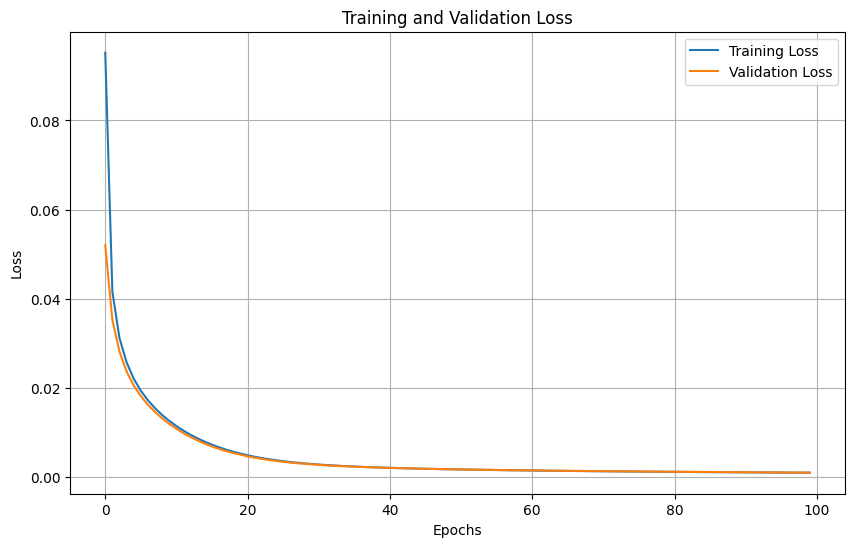

In [50]:
# Extract loss values
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

# Plot loss values
plt.figure(figsize=(10, 6))
plt.plot(loss_values, label='Training Loss')
plt.plot(val_loss_values, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [51]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"Train R2: {r2_train}")
print(f"Test R2: {r2_test}")


Train R2: 0.9891185150575302
Test R2: 0.989095600144733


# Playing With Different Hyperparameters

In [57]:
# plotting training and validation loss
def plot_loss(history, title):
    loss_values = history.history['loss']
    val_loss_values = history.history['val_loss']
    
    plt.figure(figsize=(10, 6))
    plt.plot(loss_values, label='Training Loss')
    plt.plot(val_loss_values, label='Validation Loss')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

In [58]:
# plotting the results
def evaluate_model(model, X_train, y_train, X_test, y_test, title):
    # Training the model
    t0 = time.time()
    history = model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=32,
        validation_data=(X_test, y_test),
        callbacks=[ProgBarLoggerNEpochs(num_epochs=100)]
    )
    t1 = time.time()
    print(f'{title} Elapsed time: %.2fs' % (t1 - t0))
    
    # Plot loss values
    plot_loss(history, title)
    
    # Predict and evaluate
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    
    print(f'{title} Train MSE: {mse_train}')
    print(f'{title} Test MSE: {mse_test}')
    print(f'{title} Train R2: {r2_train}')
    print(f'{title} Test R2: {r2_test}')
    print('-' * 50)


Training with learning rate: 0.01
Epoch 1/100
701/701 [==============================] - 1s 745us/step - loss: 0.0271 - mean_squared_error: 0.0271 - val_loss: 0.0084 - val_mean_squared_error: 0.0084
Epoch 2/100
701/701 [==============================] - 0s 635us/step - loss: 0.0052 - mean_squared_error: 0.0052 - val_loss: 0.0033 - val_mean_squared_error: 0.0033
Epoch 3/100
701/701 [==============================] - 0s 628us/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 4/100
701/701 [==============================] - 0s 628us/step - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0018 - val_mean_squared_error: 0.0018
Epoch 5/100
701/701 [==============================] - 0s 628us/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0015 - val_mean_squared_error: 0.0015
Epoch 6/100
701/701 [==============================] - 0s 637us/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0014 - val_mea

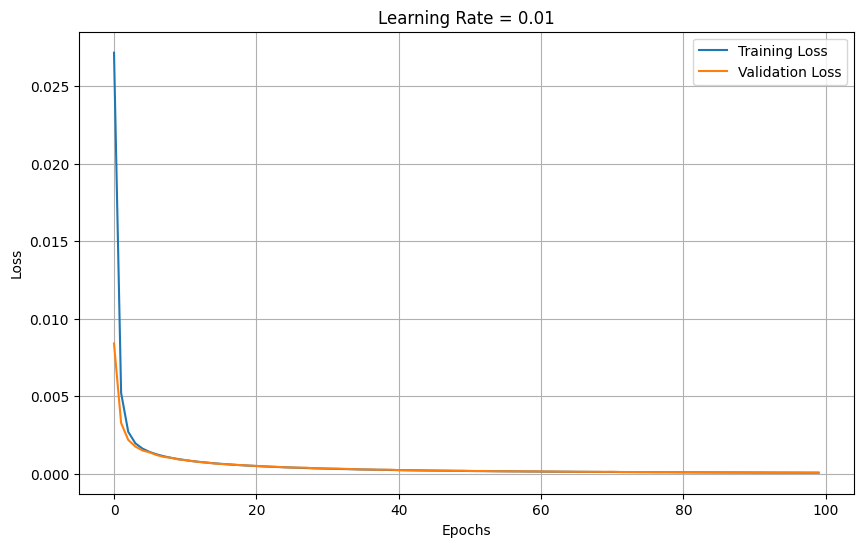

Learning Rate = 0.01 Train MSE: 7.758548945365215e-05
Learning Rate = 0.01 Test MSE: 8.375454013769747e-05
Learning Rate = 0.01 Train R2: 0.999172361160323
Learning Rate = 0.01 Test R2: 0.999127932164058
--------------------------------------------------
Training with learning rate: 0.1
Epoch 1/100
701/701 [==============================] - 1s 737us/step - loss: 0.0161 - mean_squared_error: 0.0161 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 2/100
701/701 [==============================] - 0s 626us/step - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 8.1885e-04 - val_mean_squared_error: 8.1885e-04
Epoch 3/100
701/701 [==============================] - 0s 625us/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 4/100
701/701 [==============================] - 0s 623us/step - loss: 8.0909e-04 - mean_squared_error: 8.0909e-04 - val_loss: 4.4686e-04 - val_mean_squared_error: 4.4686e-04
Epoch 5/100
701/701 [=======

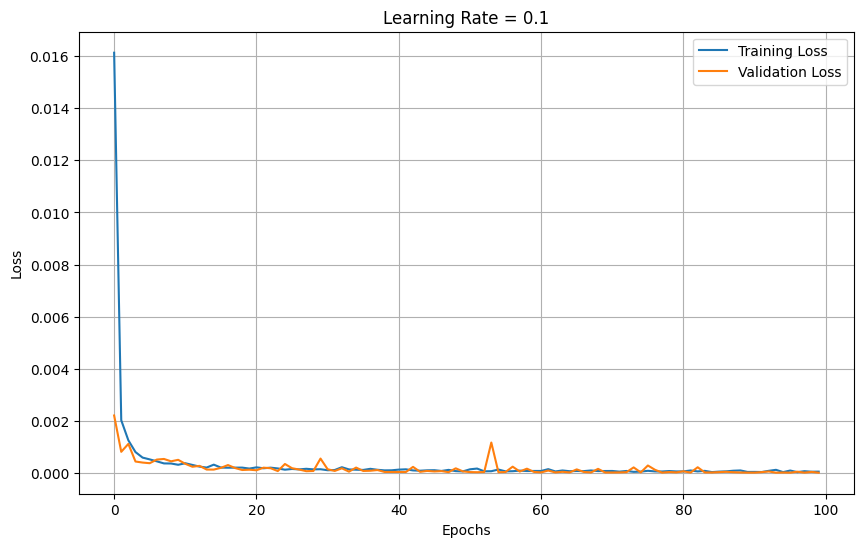

Learning Rate = 0.1 Train MSE: 1.328585186412712e-05
Learning Rate = 0.1 Test MSE: 1.69146571618476e-05
Learning Rate = 0.1 Train R2: 0.9998582739234053
Learning Rate = 0.1 Test R2: 0.9998238814463959
--------------------------------------------------


In [59]:
# Learning Rate
learning_rates = [0.01, 0.1]

for lr in learning_rates:
    print(f"Training with learning rate: {lr}")
    model = Sequential()
    model.add(InputLayer(input_shape=(X_train.shape[1],)))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='linear'))

    sgd_optimizer = keras.optimizers.SGD(learning_rate=lr)
    model.compile(loss='mean_squared_error', optimizer=sgd_optimizer, metrics=['mean_squared_error'])
    
    evaluate_model(model, X_train, y_train, X_test, y_test, f'Learning Rate = {lr}')

Training with four hidden layers
Epoch 1/100
701/701 [==============================] - 1s 946us/step - loss: 0.0288 - mean_squared_error: 0.0288 - val_loss: 0.0086 - val_mean_squared_error: 0.0086
Epoch 2/100
701/701 [==============================] - 1s 827us/step - loss: 0.0052 - mean_squared_error: 0.0052 - val_loss: 0.0032 - val_mean_squared_error: 0.0032
Epoch 3/100
701/701 [==============================] - 1s 811us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 4/100
701/701 [==============================] - 1s 819us/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoch 5/100
701/701 [==============================] - 1s 815us/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0015 - val_mean_squared_error: 0.0015
Epoch 6/100
701/701 [==============================] - 1s 814us/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0012 - val_mean

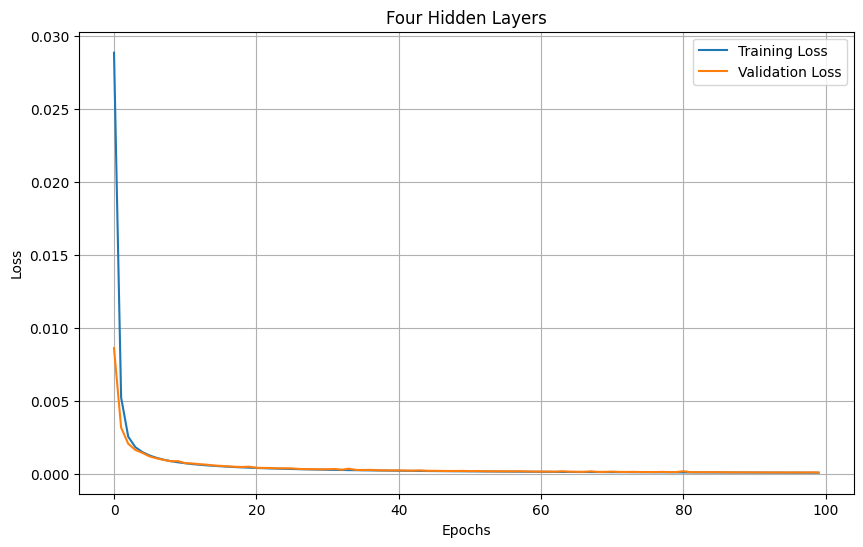

Four Hidden Layers Train MSE: 9.976568288971486e-05
Four Hidden Layers Test MSE: 0.0001148637723891178
Four Hidden Layers Train R2: 0.9989357551958765
Four Hidden Layers Test R2: 0.9988040170568566
--------------------------------------------------


In [60]:
# Trying four hidden layers
print("Training with four hidden layers")
model = Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

sgd_optimizer = keras.optimizers.SGD(learning_rate=0.01)
model.compile(loss='mean_squared_error', optimizer=sgd_optimizer, metrics=['mean_squared_error'])

evaluate_model(model, X_train, y_train, X_test, y_test, 'Four Hidden Layers')

Training with dropout layers
Epoch 1/100
701/701 [==============================] - 1s 858us/step - loss: 0.1075 - mean_squared_error: 0.1075 - val_loss: 0.0633 - val_mean_squared_error: 0.0633
Epoch 2/100
701/701 [==============================] - 1s 743us/step - loss: 0.0644 - mean_squared_error: 0.0644 - val_loss: 0.0414 - val_mean_squared_error: 0.0414
Epoch 3/100
701/701 [==============================] - 1s 740us/step - loss: 0.0505 - mean_squared_error: 0.0505 - val_loss: 0.0295 - val_mean_squared_error: 0.0295
Epoch 4/100
701/701 [==============================] - 1s 740us/step - loss: 0.0425 - mean_squared_error: 0.0425 - val_loss: 0.0241 - val_mean_squared_error: 0.0241
Epoch 5/100
701/701 [==============================] - 1s 738us/step - loss: 0.0369 - mean_squared_error: 0.0369 - val_loss: 0.0202 - val_mean_squared_error: 0.0202
Epoch 6/100
701/701 [==============================] - 1s 736us/step - loss: 0.0332 - mean_squared_error: 0.0332 - val_loss: 0.0170 - val_mean_squ

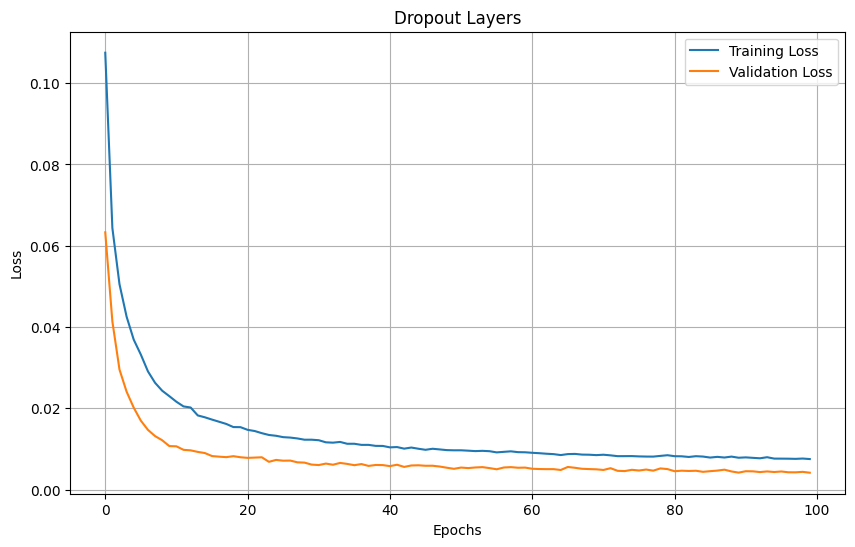

Dropout Layers Train MSE: 0.0041251602704721856
Dropout Layers Test MSE: 0.00414755895388974
Dropout Layers Train R2: 0.9559950851147906
Dropout Layers Test R2: 0.9568148454350796
--------------------------------------------------


In [61]:
# Adding dropout layers
print("Training with dropout layers")
model = Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='linear'))

sgd_optimizer = keras.optimizers.SGD(learning_rate=0.01)
model.compile(loss='mean_squared_error', optimizer=sgd_optimizer, metrics=['mean_squared_error'])

evaluate_model(model, X_train, y_train, X_test, y_test, 'Dropout Layers')